# Analysis of Categorical Data

In [19]:
import math
import scipy

In [8]:
N1 = 14134
N2 = 14073
P1 = 11
P2 = 185

In [9]:
Pi1 = P1/N1
Pi2 = P2/N1
Pi1,Pi2

(0.0007782651761709354, 0.013089005235602094)

In [46]:
PredPositiveBasedP2 = N1*(Pi2)
efficacy = 1 - (P1/PredPositiveBasedP2)
efficacy

0.9405405405405405

### Confidence interval for Pi

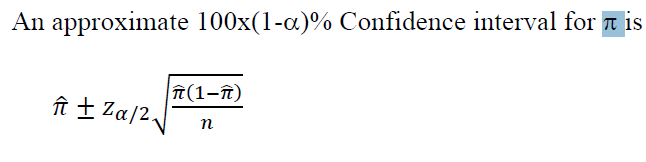

In [20]:
from scipy.stats import chisquare
import statistics as stat
import scipy.stats as st

In [44]:
## CI for Pi1 ##
alpha =  0.05
Z = st.norm.ppf(1-(alpha/2))

CI1_LCL = Pi1 - (Z*(math.sqrt((1-Pi1)*Pi1/N1)))                 
CI1_HCL = Pi1 + (Z*(math.sqrt((1-Pi1)*Pi1/N1)))

CI1_LCL,CI1_HCL

(0.0003185273026637554, 0.0012380030496781152)

In [45]:
## CI for Pi2 ##
alpha =  0.05
Z = st.norm.ppf(1-(alpha/2))

CI2_LCL = Pi2 - (Z*(math.sqrt((1-Pi2)*Pi2/N2)))                 
CI2_HCL = Pi2 + (Z*(math.sqrt((1-Pi2)*Pi2/N2)))

CI2_LCL,CI2_HCL

(0.011211215064329046, 0.014966795406875143)

In [39]:
math.sqrt((1-Pi1)*Pi1/N1)

0.00023456444972128757

## Sample size requirment for 100x(1-alpha) CI for Pi

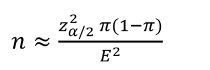

E = acceptable error

If no info on Pi is available use 0.5 as Pi

In [48]:
alpha =  0.05
Z = st.norm.ppf(1-(alpha/2))
Pi = 0.5
E = 0.05 #given in the question, acceptable error
SampleSize =  ((Z**2) * (Pi *(1-Pi)))/(E**2)
SampleSize

384.14588206941244

## Hypothesis Test for Pi

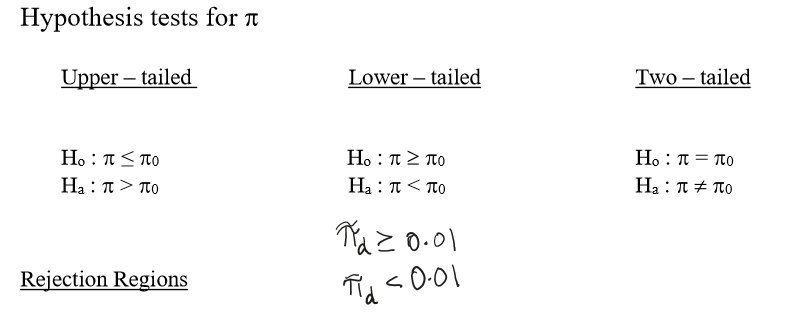

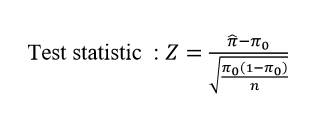

Pi0 = Pi1 - Pi2 if Pi1>Pi2, else ops Pi0 should be +ve

In [51]:
Pi0 = Pi2-Pi1 # here Pi2>Pi1 else Pi1-Pi2
Pi0

0.012310740059431158

In [55]:
Pi0 = 0.01 #if given in question else comment this

#Hypothesis testing for Pi1
Zobs1 = (Pi1 - Pi0)/(math.sqrt((Pi1*(1-Pi1))/N1))

# #Hypothesis testing for Pi2
# Zobs2 = (Pi2 - Pi0)/ ((Pi2*(1-Pi2))/N2)

Zobs1

-39.31429010144737

In [57]:
alpha =  0.01
Z = st.norm.ppf(1-(alpha))
Z

2.3263478740408408

## Inference for two population proportions

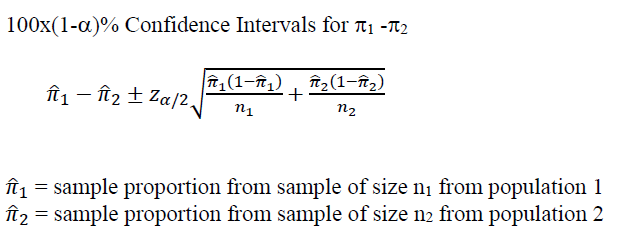


In [63]:
alpha =  0.01
Z = st.norm.ppf(1-(alpha/2))
numerator1 = Pi1*(1-Pi1)
numerator2 = Pi2*(1-Pi2)
numerator1,numerator2

(0.000777659479486495, 0.012917683177544475)

In [64]:
Pi0 = (Pi2-Pi1) # here Pi2>Pi1
LCL = Pi0 - Z *(math.sqrt((numerator1/N1)+(numerator2/N2)))
HCL = Pi0 + Z *(math.sqrt((numerator1/N1)+(numerator2/N2)))
LCL,HCL

(0.009770019128424349, 0.014851460990437968)

## Hypothesis Tests for the difference between two population proportions

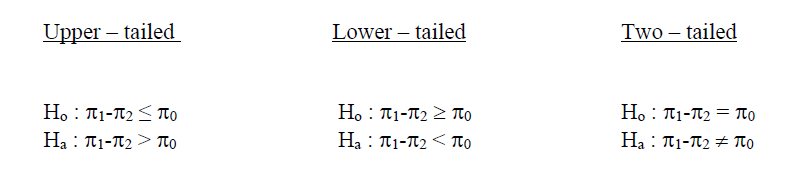

Check for H0: Pi1 != Pi2, then Zobs

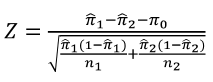

If H0: Pi = Pi2

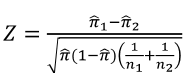

Here PiCap = (Total Sucess in Both samples/ Sum of Samples)

In [68]:
# # H0: Pi1 = Pi2
# num = Pi1 - Pi2
# PiCap = (P1+P2)/(N1+N2)
# denom = math.sqrt((PiCap*(1-PiCap))*((1/N1)+(1/N2)))
# Zobs = num/denom
# PiCap,Zobs

(0.006948629772751445, -12.445035948843879)

In [70]:
# H0: Pi1 != Pi2
num = Pi1 - Pi2
denom = math.sqrt(((Pi1*(1-Pi1))/N1)+((Pi2*(1-Pi2))/N2))
Zobs = num/denom
Zobs

-12.480853212355855

In [76]:
alpha =  0.01
ZPlus = st.norm.ppf(1-(alpha/2))
ZNeg = st.norm.ppf((alpha/2))
ZPlus,ZNeg

(2.5758293035489004, -2.575829303548901)

## Tests for Independence and Homogeneity

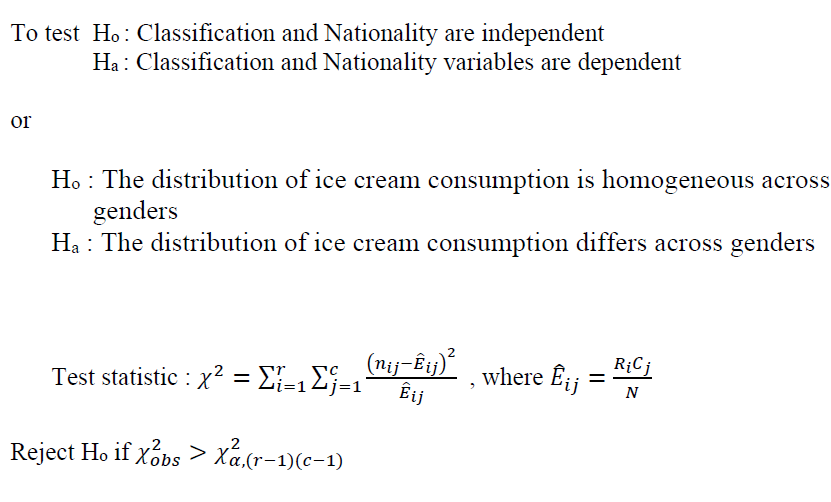

r/R = Row & c/C = Column

R = Condition like +Ve/ -Ve & 
C = Diffrent group like parties, dosages

##### This is a One sided probability

In [121]:
r1c1 = 11 #Column Total for Dose1
r1c2 = 185 #Column Total for Placebo1
r1c3 = 8   #Column Total for Dose2
r1c4 = 162 #Column Total for Placebo2
C1Total = 14134
C2Total = 14073
C3Total = 18198
C4Total = 18325

r2c1 = C1Total - r1c1
r2c2 = C2Total - r1c2
r2c3 = C3Total - r1c3
r2c4 = C4Total - r1c4
 

R1Total = r1c1 + r1c2 + r1c3 + r1c4 #+PosP2
R2Total = r2c1 + r2c2 + r2c3 + r2c4 #+NegP2

TotalSum =R1Total+R2Total #N

# print(F'Row Totals, R1Total:{R1Total}, R2Total:{R1Total}')
# print(f'Column Totals, C1Total: {C1Total},C2Total:{C2Total},C3Total:{C3Total},C4Total:{C4Total}')
# print('Total Sum:', TotalSum)
# print(f'PosD1:{PosD1},PosP1:{PosP1},NegD1:{NegD1},NegP1:{NegP1},PosD2:{PosD2},NegD2:{NegD2}')

In [117]:
import pandas as pd
import numpy as np

In [122]:
row1 = [r1c1,r1c2,r1c3,r1c4,R1Total]
row2 = [r2c1,r2c2,r2c3,r2c4,R2Total]
row3 = [C1Total,C2Total,C3Total,C4Total,TotalSum]
table = pd.DataFrame((row1,row2,row3),columns=['C1','C2','C3','C4','Total'])
table

,C1,C2,C3,C4,Total
0,11,185,8,162,366
1,14123,13888,18190,18163,64364
2,14134,14073,18198,18325,64730


In [123]:
Xs1 = ((r1c1 - ((R1Total*C1Total)/TotalSum))**2)/((R1Total*C1Total)/TotalSum)
Xs2 = ((r1c2 - ((R1Total*C2Total)/TotalSum))**2)/((R1Total*C2Total)/TotalSum)
Xs3 = ((r1c3 - ((R1Total*C3Total)/TotalSum))**2)/((R1Total*C3Total)/TotalSum)
Xs4 = ((r1c4 - ((R1Total*C4Total)/TotalSum))**2)/((R1Total*C4Total)/TotalSum)

Xs5 = ((r2c1 - ((R2Total*C1Total)/TotalSum))**2)/((R2Total*C1Total)/TotalSum)
Xs6 = ((r2c2 - ((R2Total*C2Total)/TotalSum))**2)/((R2Total*C2Total)/TotalSum)
Xs7 = ((r2c3 - ((R2Total*C3Total)/TotalSum))**2)/((R2Total*C3Total)/TotalSum)
Xs8 = ((r2c4 - ((R2Total*C4Total)/TotalSum))**2)/((R2Total*C4Total)/TotalSum)



Xobs = Xs1+Xs2+Xs3+Xs4+Xs5+Xs6+Xs7+Xs8

Xobs

321.3504233806083

In [125]:
#CHISQR TEST
# (1 -) Depends on lower or upper tailed, this is currently lower tailed
alpha = 0.05
r = 2 #total no.of Rows
c = 4 #total no.of coloumns
# a = 1 - alpha # lower Tail
a = alpha #upper Tail 
dof = (r-1)*(c-1)  #degree of freedom
scipy.stats.chi2.ppf(1 - a, dof)

7.814727903251179

In [111]:
####Slide Problem####
Nd1 = 40 #Column Total for Dose1
Np1 = 38 #Column Total for Placebo1
PosD1 = 16
PosP1 = 21
NegD1 = Nd1 - PosD1
NegP1 = Np1 - PosP1

Nd2 = 24 #Column Total for Dose2
# Np2 = 18325 #Column Total for Placebo2
PosD2 = 11
# PosP2 = 162
NegD2 = Nd2 - PosD2
# NegP2 = Np2 - PosP2 

TotalColumPos = PosD1+PosP1+PosD2 #+PosP2
TotalColumneg = NegD1+NegP1+NegD2 #+NegP2

TotalSum =TotalColumPos+TotalColumneg #N

print(F'Row Totals Nd1:{Nd1}, Np1:{Np1}, Nd2:{Nd2}') #,Np2:{Np2}')
print(f'Column Totals TotalColumPos: {TotalColumPos},TotalColumneg:{TotalColumneg}')
print('Total Sum:', TotalSum)
print(f'PosD1:{PosD1},PosP1:{PosP1},NegD1:{NegD1},NegP1:{NegP1},PosD2:{PosD2},NegD2:{NegD2}')

Row Totals Nd1:40, Np1:38, Nd2:24
Column Totals TotalColumPos: 48,TotalColumneg:54
Total Sum: 102
PosD1:16,PosP1:21,NegD1:24,NegP1:17,PosD2:11,NegD2:13


In [112]:
Xs1 = ((PosD1 - ((TotalColumPos*Nd1)/TotalSum))**2)/((TotalColumPos*Nd1)/TotalSum)
Xs2 = ((PosP1 - ((TotalColumPos*Np1)/TotalSum))**2)/((TotalColumPos*Np1)/TotalSum)
Xs3 = ((PosD2 - ((TotalColumPos*Nd2)/TotalSum))**2)/((TotalColumPos*Nd2)/TotalSum)
Xs4 = ((NegD1 - ((TotalColumneg*Nd1)/TotalSum))**2)/((TotalColumneg*Nd1)/TotalSum)
Xs5 = ((NegP1 - ((TotalColumneg*Np1)/TotalSum))**2)/((TotalColumneg*Np1)/TotalSum)
Xs6 = ((NegD2 - ((TotalColumneg*Nd2)/TotalSum))**2)/((TotalColumneg*Nd2)/TotalSum)

Xobs = Xs1+Xs2+Xs3+Xs4+Xs5+Xs6 #+Xs4
# Xs1+Xs2+Xs3+Xs4+Xs5+Xs6
Xobs

1.8411488791423

In [114]:
#CHISQR TEST
# (1 -) Depends on lower or upper tailed, this is currently lower tailed
alpha = 0.05
r = 2 #total no.of Rows
c = 3 #total no.of coloumns
# a = 1 - alpha # lower Tail
a = alpha #upper Tail 
dof = (r-1)*(c-1)  #degree of freedom
scipy.stats.chi2.ppf(1 - a, dof)

5.991464547107979

### To check if 2 diffrent study groups can be compared

H0: PiCase1 = PiCase2 & Ha: PiCase1 != PiCase2

Zobs = (|PiCase1 - PiCase2|)/ (math.sqrt((PiCap*(1-PiCap))*((1/N1)+(1/N2))))

In [127]:
Pi1 = (185/14073)
Pi2 = (162/18325)
N1 = 14073
N2 = 18325
num = np.abs(Pi1 - Pi2)
PiCap = (P1+P2)/(N1+N2)
denom = math.sqrt((PiCap*(1-PiCap))*((1/N1)+(1/N2)))
Zobs = num/denom

Pi1,Pi2,PiCap,Zobs

(0.013145740069636893,
 0.008840381991814462,
 0.006049756157787518,
 4.953523814009258)

In [130]:
import scipy.stats as st
alpha =  0.05
Z = st.norm.ppf(1-(alpha/2))
Z

1.959963984540054

0.004305358077822431